In [44]:
# global var set
import transformers

# model info, change as needed
model_checkpoint = "roberta-base"
batch_size = 16
num_epochs = 16

fileTag = "clean-v1"

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [45]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [46]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//3], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//3:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//3], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//3 : trainDatasetOriginal.shape[0]//3*2], 
                                                           trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//3*2:]])]), 
                                  'selection2': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//3*2], 
                                                           trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//3*2:]]),
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//3 else (1 if x < trainDatasetOriginal.shape[0]//3*2 else 2) for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'],
                                   'plutchik' : testDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//3], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//3:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//3], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//3 : testDatasetOriginal.shape[0]//3*2], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//3*2:]])]), 
                                  'selection2': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//3*2], 
                                                           testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//3*2:]]),
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//3 else (1 if x < testDatasetOriginal.shape[0]//3*2 else 2) for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

In [47]:
trainDatasetProcessed.to_csv(f'./dataset/3Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,label
0,"['uncomfortable', 'warm']","{'joy': 1, 'trust': 0, 'fear': 1, 'surprise': ...",Everyone cheered him on.,The room was not air conditioned and Dan was w...,Sheena had always wanted to be a boxer.,1
1,"['fear', 'afraid', 'anger', 'sadness', 'depres...","{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...",Jen was sitting in her living room.,It was killed by a car.,On the way to the cinema we got into a car acc...,2
2,"['embarrassed', 'clumsy', 'unprepared']","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",Billy started posting list articles with broad...,They informed me that I had to leave.,I didn't keep my grip on one.,2
3,"['studious', 'prepared', 'nervous']","{'joy': 1, 'trust': 1, 'fear': 1, 'surprise': ...",William went to his school to pick up his clas...,They set up their kayaks and climbed in to beg...,Kate and her friends were at a restaurant.,0
4,"['urgent', 'anxious', 'scared']","{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...",Dave wanted to bake a cake.,She met a man that lived in Europe.,He raced around the house trying to find it.,2
...,...,...,...,...,...,...
11605,"['sad', 'afraid']","{'joy': 0, 'trust': 1, 'fear': 3, 'surprise': ...",He tracked himself doing this for two months.,"A huge jackrabbit was caught, struggling to ge...",She was afraid she would have to feed the big ...,2
11606,"['happy', 'love', 'excited']","{'joy': 3, 'trust': 2, 'fear': 0, 'surprise': ...",She looked from rack to rack searching.,The Smiths were out on a date night.,He got to take home the bowling pin trophy.,1
11607,"['confused', 'disappointed', 'sad', 'angry']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",She went to Costco and returned all of her boo...,"When he got to the doctor, he barely felt the ...",Sarah still can't understand why no one praise...,2
11608,"['embarrassed', 'pain', 'injured', 'shocked', ...","{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...",I played speed chess on the internet this morn...,The bartender knew this look very well.,"When I went to do another one, I hurt my ankle.",2


In [48]:
testDatasetProcessed.to_csv(f'./dataset/3Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,label
0,"['satisfied', 'excited', 'eager']","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ...",Finally she was able to get the phone she wanted.,His roommate was a teammate from the high scho...,AJ broke his glasses.,0
1,"['relieved', 'happy', 'cured']","{'joy': 3, 'trust': 2, 'fear': 0, 'surprise': ...",He heads down to the track.,"But Christina, who was white, made friends wit...",He actually enjoyed his flight.,2
2,"['hopeful', 'sad', 'disappointed', 'competitive']","{'joy': 1, 'trust': 1, 'fear': 1, 'surprise': ...",She tried her best to get better.,I was so disappointed.,Hannah went shopping.,0
3,"['embarrassed', 'sad', 'failure']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",He gained a lot of weight.,"His father told him if he was good, he would b...",Bruce married a woman named Kim.,0
4,"['uncomfortable', 'mad', 'upset']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",I was still unable to find comfort and style.,"Afterwards, I decided to go home and take the ...",It was her first visit.,0
...,...,...,...,...,...,...
11124,"['relief', 'relieved']","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ...",Inside was a dead body.,Emily didn't have any problems.,She said it was the best thing she'd ever tasted.,1
11125,"['anxious', 'scared', 'apprehensive']","{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...",Kia had just packed herself a plate and a fork!,He stopped eating ice cream and got a girlfriend.,"The approaching storm was a big one, and Max w...",2
11126,"['confused', 'guilty', 'concern', 'calm']","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",George sat on his bed and it collapsed to the ...,The officers said they were taking him home to...,But then she tried it.,1
11127,"['excited', 'rebellious', 'bold']","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ...",He told her that it's impossible since there's...,Eventually she made friends and got better at ...,Sam and his friends decided to throw a hotel p...,2


# load dataset

In [49]:
from datasets import load_dataset, load_metric

In [50]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/3Select-{fileTag}-train.csv', 
                                           'test': f'./dataset/3Select-{fileTag}-test.csv'})

Using custom data configuration default-6e66e58605373597


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\JAM_0\.cache\huggingface\datasets\csv\default-6e66e58605373597\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [51]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'label'],
        num_rows: 11610
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'label'],
        num_rows: 11129
    })
})

In [52]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': "['satisfied', 'excited', 'eager']",
 'plutchik': "{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': 1, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 2}",
 'selection0': 'Finally she was able to get the phone she wanted.',
 'selection1': 'His roommate was a teammate from the high school track team.',
 'selection2': 'AJ broke his glasses.',
 'label': 0}

In [53]:
def show_one(example):
    print(f"Context: {example['plutchik']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"  C - {example['selection2']}")
    print(f"\nGround truth: option {['A', 'B', 'C'][example['label']]}")

In [54]:
show_one(dataset["train"][0])

Context: {'joy': 1, 'trust': 0, 'fear': 1, 'surprise': 1, 'sadness': 1, 'disgust': 1, 'anger': 1, 'anticipation': 1}
  A - Everyone cheered him on.
  B - The room was not air conditioned and Dan was warm.
  C - Sheena had always wanted to be a boxer.

Ground truth: option B


# Preprocessing Data

In [55]:
from transformers import AutoTokenizer
    
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [56]:
import re
selectionList = ["selection0", "selection1", "selection2"]
weightRemap = ["NOT ", "LITTLE ", "", "VERY ", "ABSOLUTELY "]
def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*2 for context in examples["emotion"] ]
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\"', '')) ]*2 for context in examples["plutchik"] ]
    first_sentences = [["The following sentences contain emotions: {}".format(", ".join([weightRemap[int(eachCaseWeight.replace("]", "").replace("[", "").replace("}", "").replace("{", "").replace("\"", "").replace("\'", ""))] 
                                                        + eachCaseEmotionType.replace("]", "").replace("[", "").replace("}", "").replace("{", "").replace("\"", "").replace("\'", "").strip()
                        for eachCaseWeight, eachCaseEmotionType in 
                        zip([re.split(':|,',eachEmotionCombination)[1::2] for eachEmotionCombination in examples["plutchik"]][eventIndex], 
                           [re.split(':|,',eachEmotionCombination)[::2] for eachEmotionCombination in examples["plutchik"]][eventIndex])]))]*3 for eventIndex in 
                           range(len([re.split(':|,',eachEmotionCombination)[1::2] for eachEmotionCombination in examples["plutchik"]]))]
    
    # first_sentences = [["The following sentences contain emotions: {}".format(', '.join([(weightRemap[eachEmotion[1]] + " " +eachEmotion[0]).strip() 
    #                    for eachEmotion in ast.literal_eval(context).items()]))]*2 
    #                    for context in examples["plutchik"]]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList]for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+3] for i in range(0, len(v), 3)] for k, v in tokenized_examples.items()}

In [57]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 3 [52, 58, 57]


In [58]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(3) ]

['<s>The following sentences contain emotions: LITTLE joy, NOT trust, LITTLE fear, LITTLE surprise, LITTLE sadness, LITTLE disgust, LITTLE anger, LITTLE anticipation</s></s>Everyone cheered him on.</s>',
 '<s>The following sentences contain emotions: LITTLE joy, NOT trust, LITTLE fear, LITTLE surprise, LITTLE sadness, LITTLE disgust, LITTLE anger, LITTLE anticipation</s></s>The room was not air conditioned and Dan was warm.</s>',
 '<s>The following sentences contain emotions: LITTLE joy, NOT trust, LITTLE fear, LITTLE surprise, LITTLE sadness, LITTLE disgust, LITTLE anger, LITTLE anticipation</s></s>Sheena had always wanted to be a boxer.</s>',
 '<s>The following sentences contain emotions: NOT joy, NOT trust, fear, surprise, LITTLE sadness, NOT disgust, NOT anger, LITTLE anticipation</s></s>Jen was sitting in her living room.</s>',
 '<s>The following sentences contain emotions: NOT joy, NOT trust, fear, surprise, LITTLE sadness, NOT disgust, NOT anger, LITTLE anticipation</s></s>It wa

In [59]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

  0%|          | 0/12 [00:00<?, ?ba/s]

  0%|          | 0/12 [00:00<?, ?ba/s]

In [37]:
from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer

model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultipleChoice: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultipleChoice were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predi

In [38]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    learning_rate=5e-6, # for bert-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
)

In [39]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [40]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [43]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(3)]

['<s>The following sentences contain emotions: anticipation</s></s>George sprained his ankle going down the stairs.</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: anticipation</s></s>He made a flyer asking for a strong helper.</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: anticipation</s></s>He hopped off the boat into the crystal clear water.</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>']

In [42]:
show_one(dataset["train"][8])

Context: ["anticipation:2"]
  A - George sprained his ankle going down the stairs.
  B - He made a flyer asking for a strong helper.
  C - He hopped off the boat into the crystal clear water.

Ground truth: option B


# Trainer Defined

In [19]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [20]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [21]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForMultipleChoice.forward` and have been ignored: plutchik, Unnamed: 0, selection1, emotion, selection0. If plutchik, Unnamed: 0, selection1, emotion, selection0 are not expected by `BertForMultipleChoice.forward`,  you can safely ignore this message.
C:\Python\miniconda3\envs\pytorchEnvWithDataSci\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 53234
  Num Epochs = 16
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 53248


Epoch,Training Loss,Validation Loss,Accuracy
1,0.693800,0.693128,0.504018
2,0.614600,0.594435,0.656838
3,0.564700,0.571774,0.684685
4,0.526300,0.572104,0.695053
5,0.499500,0.586160,0.701162
6,0.472300,0.586649,0.705170
7,0.467500,0.620333,0.704207
8,0.444200,0.623844,0.704265
9,0.415700,0.655308,0.705055
10,0.394100,0.685141,0.703860


Saving model checkpoint to bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500
Configuration saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\config.json
Model weights saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\pytorch_model.bin
tokenizer config file saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\tokenizer_config.json
Special tokens file saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\special_tokens_map.json
Saving model checkpoint to bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000
Configuration saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000\config.json
Model weights saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000\tokenizer_config.json
Special tokens file saved in bert-base-uncased-finetuned-emotionCommonsen

TrainOutput(global_step=53248, training_loss=0.4483006133769567, metrics={'train_runtime': 8821.4262, 'train_samples_per_second': 96.554, 'train_steps_per_second': 6.036, 'total_flos': 5.267817952412011e+16, 'train_loss': 0.4483006133769567, 'epoch': 16.0})

出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

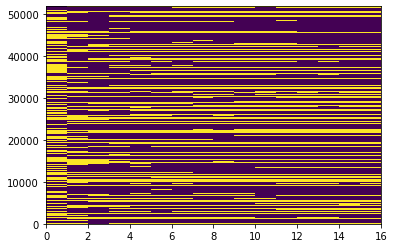

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [23]:
import pandas as pd
dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/[plutchik]trainingInfo-{fileTag}.csv')

In [24]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/[plutchik]evaluationSpecificInfo-{fileTag}.csv')